In [11]:
import sys
import importlib
import os
import matplotlib.pyplot as plt
import pandas as pd
# make the module available from the src directory
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [26]:
from src.dataLoaders.PatientDataLoader import PatientDataProcessor
importlib.reload(sys.modules['src.dataLoaders.PatientDataLoader'])

<module 'src.dataLoaders.PatientDataLoader' from '/Users/askelundsgaard/Documents/datalogi/6-semester/Bachelor/XAI-in-Medical-Image-Analysis/src/dataLoaders/PatientDataLoader.py'>

In [31]:
meta_folder = 'OAIData21/'
data_path = '../datasets/meta_data/' + meta_folder
visit = 0

processor = PatientDataProcessor(base_path=data_path)
# processor.create_meta_data_for_visit(visit_no=visit)
processor.load_all_visits()
data = processor.get_data()
# processor.get_data()["V11WOMKPL"].unique()


Missing columns for visit V00: {'V00BMI'}
Missing columns for visit V01: {'P01BMI'}
Missing columns for visit V02: {'V02PASE', 'P01BMI', 'V02BMI'}
Missing columns for visit V03: {'P01BMI'}
Missing columns for visit V04: {'V04BMI', 'P01BMI', 'V04PASE'}
Missing columns for visit V05: {'P01BMI'}
Missing columns for visit V06: {'P01BMI'}
Missing columns for visit V07: {'V07PASE', 'V07BMI', 'P01BMI'}
Missing columns for visit V08: {'P01BMI'}
Missing columns for visit V09: {'P01BMI', 'V09BMI', 'V09PASE'}
Missing columns for visit V10: {'P01BMI'}
Missing columns for visit V11: {'V11PASE', 'V11BMI', 'P01BMI'}


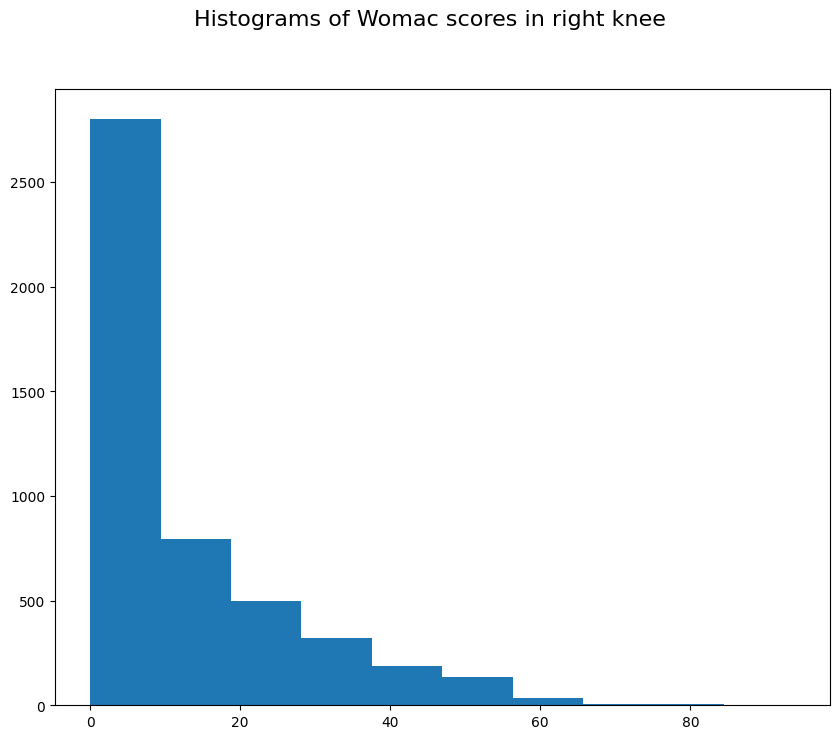

In [14]:
womac_right_knee = data['V00WOMTSR']
womac_right_knee.hist(bins=10, figsize=(10, 8), grid=False)
plt.suptitle('Histograms of Womac scores in right knee', fontsize=16)
plt.show()

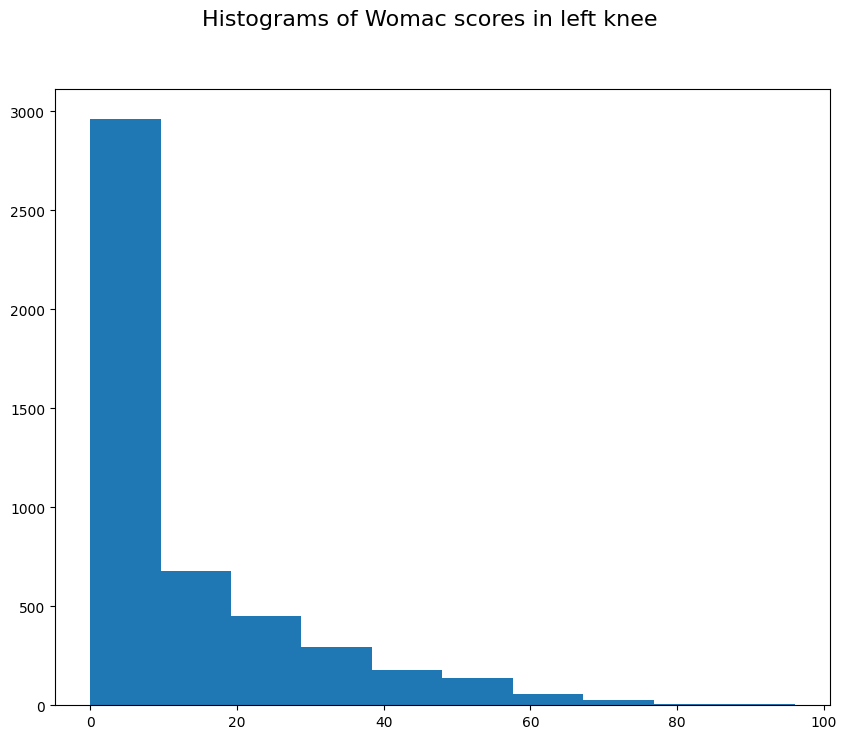

In [15]:
womac_left_knee = data['V00WOMTSL']
womac_left_knee.hist(bins=10, figsize=(10, 8), grid=False)
plt.suptitle('Histograms of Womac scores in left knee', fontsize=16)
plt.show()

In [16]:
from src.dataLoaders.NiftiDataLoader2 import NiftiDataLoader
importlib.reload(sys.modules['src.dataLoaders.NiftiDataLoader2'])

<module 'src.dataLoaders.NiftiDataLoader2' from '/Users/askelundsgaard/Documents/datalogi/6-semester/Bachelor/XAI-in-Medical-Image-Analysis/src/dataLoaders/NiftiDataLoader2.py'>

In [17]:
def sample_uniformly(df, feature, n_samples):
    """
    Sample n_samples rows uniformly distributed according to the specified feature.

    Parameters:
    - df: pandas DataFrame
    - feature: str, the name of the feature to sample uniformly
    - n_samples: int, total number of samples desired

    Returns:
    - pandas DataFrame containing the sampled rows
    """
    unique_values = df[feature].unique()
    n_unique_values = len(unique_values)

    # Calculate number of samples per unique value
    samples_per_value = max(1, n_samples // n_unique_values)

    sampled_df_list = []
    for value in unique_values:
        value_group = df[df[feature] == value]
        sampled_value_group = value_group.sample(n=min(samples_per_value, len(value_group)), replace=False)
        sampled_df_list.append(sampled_value_group)

    sampled_df = pd.concat(sampled_df_list).sample(n=n_samples, replace=False).reset_index(drop=True)
    return sampled_df


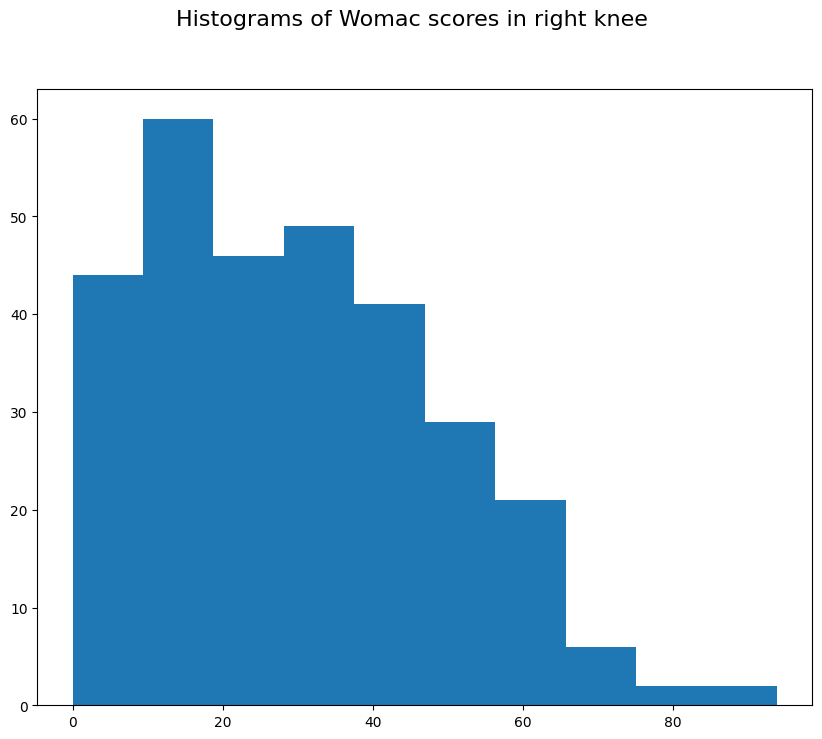

In [18]:
womac_right_knee_uni = sample_uniformly(data, 'V00WOMTSR', 300)
womac_right_knee_uni['V00WOMTSR'].hist(bins=10, figsize=(10, 8), grid=False)
plt.suptitle('Histograms of Womac scores in right knee', fontsize=16)
plt.show()

In [19]:
data.shape

(4796, 170)